In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [79]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding='latin1')

In [80]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [81]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [82]:
df.shape

(1303, 13)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


NO NULL VALUES

In [84]:
null_values = df.isnull()

# Display the DataFrame with null value indicators
print(null_values)

      laptop_ID  Company  Product  TypeName  Inches  ScreenResolution    Cpu  \
0         False    False    False     False   False             False  False   
1         False    False    False     False   False             False  False   
2         False    False    False     False   False             False  False   
3         False    False    False     False   False             False  False   
4         False    False    False     False   False             False  False   
...         ...      ...      ...       ...     ...               ...    ...   
1298      False    False    False     False   False             False  False   
1299      False    False    False     False   False             False  False   
1300      False    False    False     False   False             False  False   
1301      False    False    False     False   False             False  False   
1302      False    False    False     False   False             False  False   

        Ram  Memory    Gpu  OpSys  Weig

In [85]:
df.duplicated().sum()

0

**removing gb and kg**

In [86]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')

df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

In [87]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [88]:

df['price'] = (df['Price_euros'] * 91.25).astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578


/tmp/ipykernel_33/3127329296.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

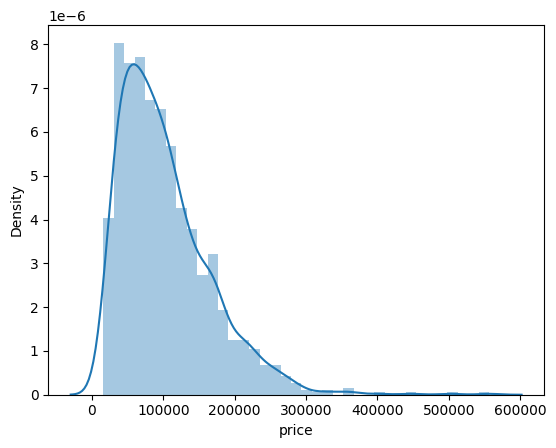

In [89]:
import seaborn as sns
sns.distplot(df['price'])

<Axes: xlabel='Company'>

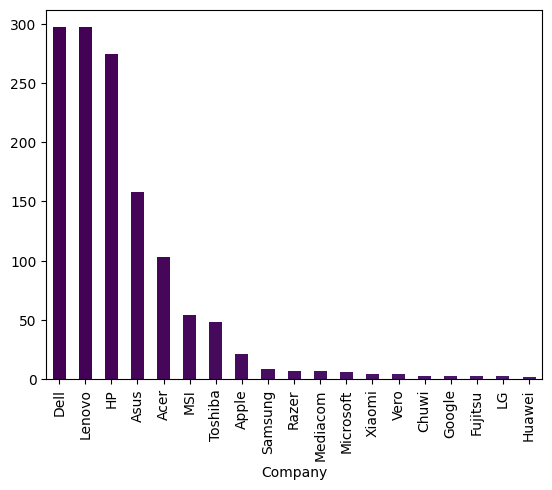

In [90]:
company_count = df['Company'].value_counts()
colors = plt.cm.viridis(range(len(company_count)))
df['Company'].value_counts().plot(kind='bar',color = colors)

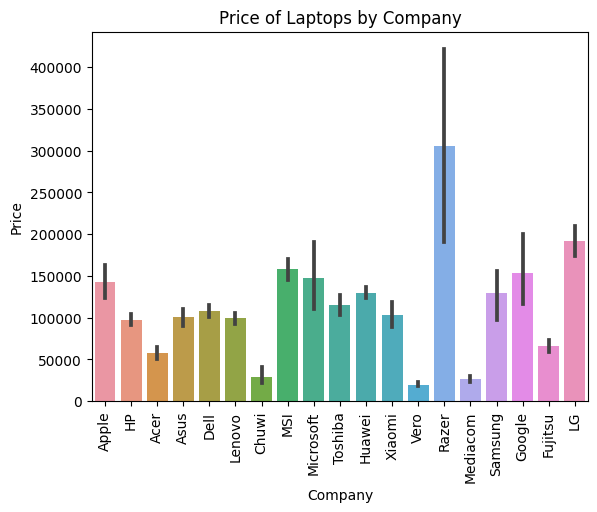

In [91]:


import seaborn as sns

# Assuming df['Company'] is categorical and df['price'] is numerical
sns.barplot(x='Company', y='price', data=df)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price of Laptops by Company')
plt.xticks(rotation=90)  
plt.show()


<Axes: xlabel='TypeName'>

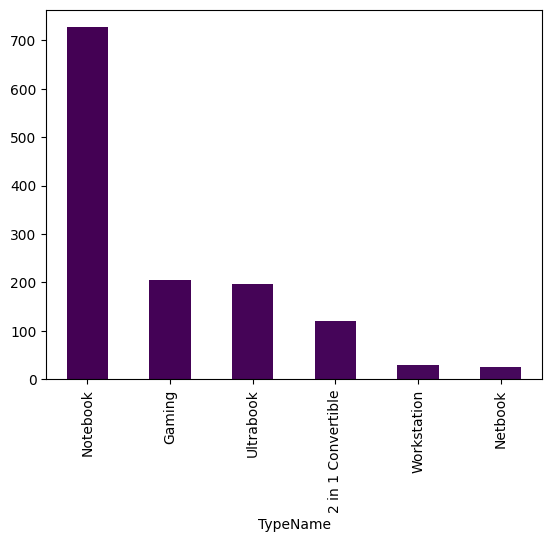

In [92]:
typeco = df['TypeName'].value_counts()
colors = plt.cm.viridis(range(len(typeco)))
typeco.plot(kind='bar',color = colors)

In [93]:
df['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [94]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [95]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [96]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0


<Axes: xlabel='touchscreen'>

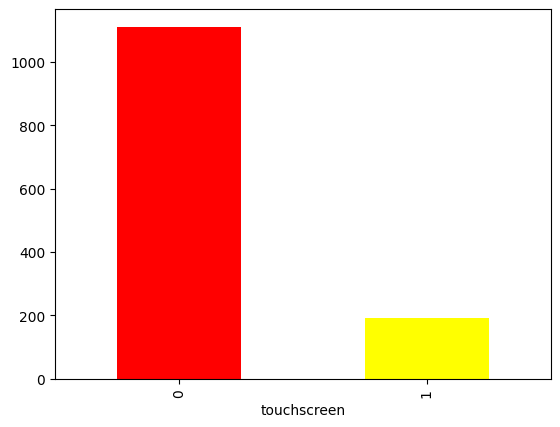

In [97]:
colors = ['red','yellow']
df['touchscreen'].value_counts().plot(kind = "bar",color = colors)

In [98]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPS Panel'>

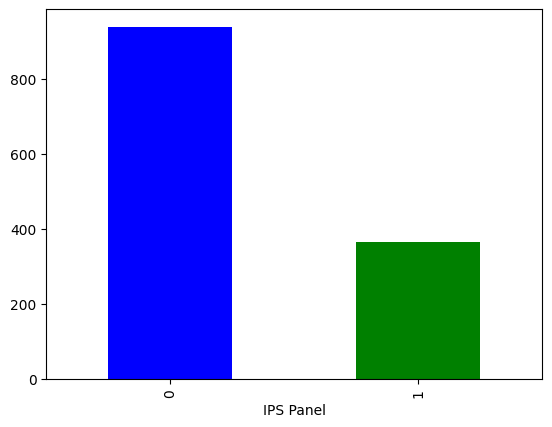

In [99]:
colors = ['blue','green']
df['IPS Panel'].value_counts().plot(kind = "bar",color = colors)

In [100]:
df['Full HD'] = df['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

<Axes: xlabel='Full HD'>

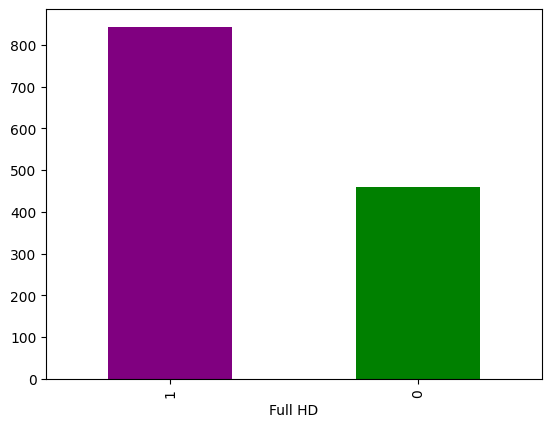

In [101]:
colors = ['purple','green']
df['Full HD'].value_counts().plot(kind = "bar",color = colors)

In [102]:
df['Quad HD+'] = df['ScreenResolution'].apply(lambda x:1 if 'Quad HD+' in x else 0)

<Axes: xlabel='Quad HD+'>

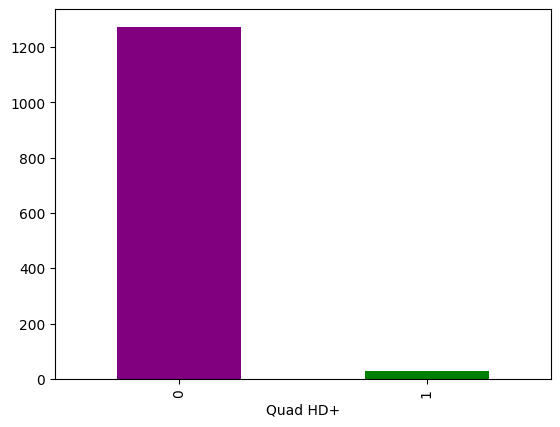

In [103]:
colors = ['purple','green']
df['Quad HD+'].value_counts().plot(kind = "bar",color = colors)

In [104]:
df[['width', 'height']] = df['ScreenResolution'].str.split('x', expand=True)

In [105]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,IPS Panel Retina Display 2560,1600


In [106]:
# Extracting  numeric values from the 'description' column
df['width'] = df['width'].astype(str)
df['width'] = df['width'].str.extract('(\d+)').astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,2560,1600


In [107]:
df['width'].astype(int)
df['height'].astype(int)
df.drop('Price_euros',axis = 1,inplace = True)

In [108]:
df['price'].round().astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164578,0,1,0,0,2560,1600


In [109]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'price', 'touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', 'width',
       'height'],
      dtype='object')

In [110]:
# df.drop('ScreenResolution',axis = 1,inplace = True)

In [111]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [112]:
df.sample(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
134,137,HP,15-BS078nr (i7-7500U/8GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.05,54567,0,0,0,0,1366,768
658,666,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960,Windows 10,3.31,109135,0,1,1,0,1920,1080
258,263,MSI,GT73EVR 7RE,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,228033,0,0,1,0,1920,1080
699,707,HP,15-bs011nv (i7-7500U/4GB/500GB/Radeon,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.10,62871,0,1,1,0,1920,1080
372,378,Asus,Rog Strix,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25,200658,0,1,1,0,1920,1080
562,569,HP,EliteBook 1030,Ultrabook,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y75 1.2GHz,16,512GB SSD,Intel HD Graphics 515,Windows 10,1.16,179306,1,1,0,1,3200,1800
816,825,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,164158,1,1,0,0,4,2160
124,127,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,41153,0,0,0,0,1366,768
232,237,Lenovo,Legion Y720-15IKB,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,136783,0,1,1,0,1920,1080
191,195,Vero,K147 (N3350/4GB/32GB/FHD/W10),Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,23725,0,1,1,0,1920,1080


In [113]:
df['i5'] = df['Cpu'].apply(lambda x:1 if 'i5' in x else 0)

<Axes: xlabel='i5', ylabel='count'>

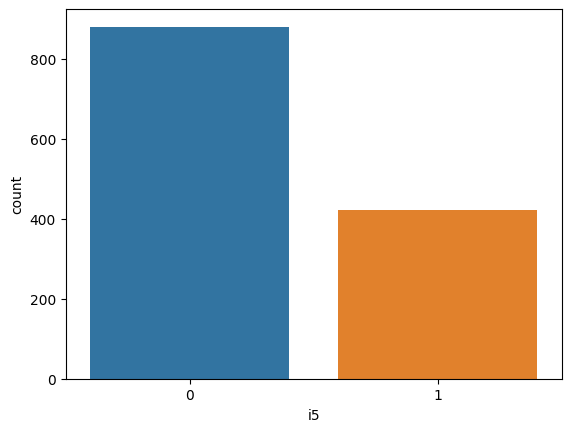

In [114]:
sns.countplot(x='i5', data=df)

In [115]:
df['i7'] = df['Cpu'].apply(lambda x:1 if 'i7' in x else 0)

<Axes: xlabel='i7', ylabel='count'>

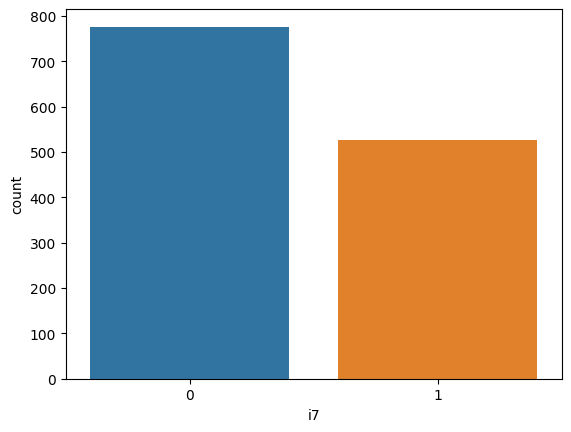

In [116]:
sns.countplot(x='i7', data=df)

In [117]:
df['i3'] = df['Cpu'].apply(lambda x:1 if 'i3' in x else 0)

<Axes: xlabel='i3', ylabel='count'>

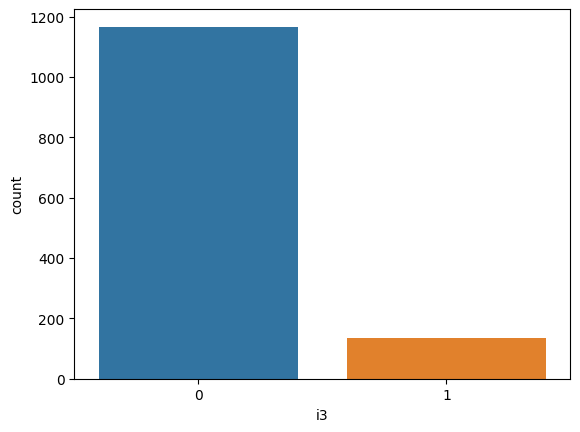

In [118]:
sns.countplot(x='i3', data=df)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  price             1303 non-null   int64  
 13  touchscreen       1303 non-null   int64  
 14  IPS Panel         1303 non-null   int64  
 15  Full HD           1303 non-null   int64  
 16  Quad HD+          1303 non-null   int64  


In [120]:
df.drop('laptop_ID',axis = 1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height,i5,i7,i3
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,122246,0,1,0,0,2560,1600,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,82028,0,0,0,0,1440,900,1,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,52468,0,0,1,0,1920,1080,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,231542,0,1,0,0,2880,1800,0,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,164578,0,1,0,0,2560,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,58217,1,1,1,0,1920,1080,0,1,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,136783,1,1,0,1,3200,1800,0,1,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,20896,0,0,0,0,1366,768,0,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,69715,0,0,0,0,1366,768,0,1,0


In [121]:
df['height'] = df['height'].astype(int)
df['height'].info

<bound method Series.info of 0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: height, Length: 1303, dtype: int64>

In [122]:
# calculating pixels per inch
df['height'].astype(int)
df['ppi'] = (df['width']**2 + df['height']**2)**0.5/df['Inches']

In [123]:
df['other'] = df['Cpu'].apply(lambda x: 1 if not any(keyword in x for keyword in ['i3', 'i5', 'i7','AMD']) else 0)

# Creating the 'amd' column
df['amd'] = df['Cpu'].apply(lambda x: 1 if 'AMD' in x else 0)


In [124]:
df.sample(8)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
979,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,...,1,0,1920,1080,0,1,0,127.335675,0,0
701,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,...,1,0,1920,1080,0,0,0,141.211998,0,1
242,247,Asus,F756UX-T4201D (i7-7500U/8GB/128GB,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,...,1,0,1920,1080,0,1,0,127.335675,0,0
299,304,Asus,ZenBook UX530UQ-PRO,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,...,1,0,1920,1080,0,1,0,141.211998,0,0
792,801,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,...,1,0,1920,1080,0,1,0,165.632118,0,0
404,411,MSI,GE73VR 7RF,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,1,0,1920,1080,0,1,0,127.335675,0,0
994,1008,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,1,0,1920,1080,1,0,0,165.632118,0,0
1056,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,...,0,0,1366,768,1,0,0,100.454670,0,0


In [125]:
df2 = pd.DataFrame([df['i3'],df['i5'],df['i7'],df['amd'],df['other']])

In [126]:
# def get_cpu_brand(row):
#     if row['i3'] == 1:
#         return 'i3'
#     elif row['i5'] == 1:
#         return 'i5'
#     elif row['i7'] == 1:
#         return 'i7'
#     elif row['amd'] == 1:
#         return 'AMD'
#     else:
#         return 'Other'

# df2['CPU BRAND'] = df2.apply(get_cpu_brand, axis=1)
# df = df[['CPU BRAND']]

# # Creating a count plot
# sns.countplot(x='CPU BRAND', data=df2)
df['other'].value_counts()

other
0    1148
1     155
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


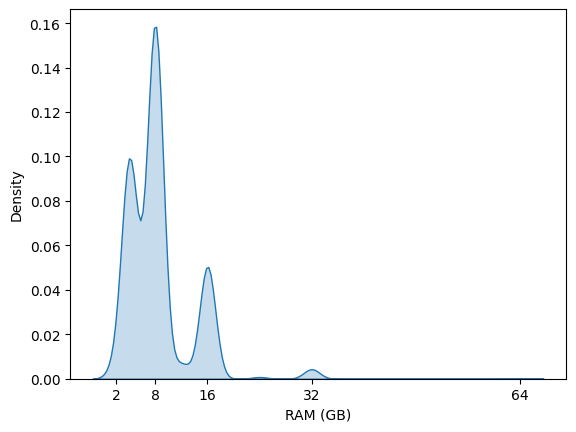

In [127]:
# kde plot
sns.kdeplot(df['Ram'], fill=True)
plt.xticks(ticks=[2,8, 16, 32, 64])
plt.xlabel('RAM (GB)')
plt.ylabel('Density')
plt.show()


In [128]:
columns_drop = ['laptop_ID','ScreenResolution','Cpu']
df = df.drop(columns_drop,axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   price        1303 non-null   int64  
 10  touchscreen  1303 non-null   int64  
 11  IPS Panel    1303 non-null   int64  
 12  Full HD      1303 non-null   int64  
 13  Quad HD+     1303 non-null   int64  
 14  width        1303 non-null   int64  
 15  height       1303 non-null   int64  
 16  i5           1303 non-null   int64  
 17  i7           1303 non-null   int64  
 18  i3           1303 non-null   int64  
 19  ppi   

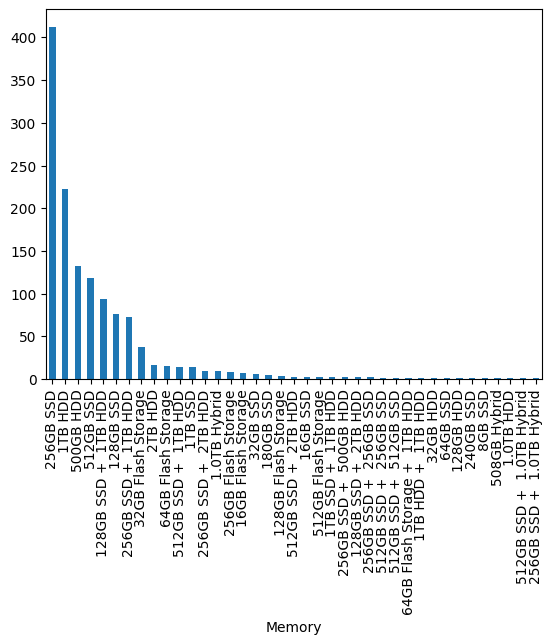

In [129]:
 plt  = df['Memory'].value_counts().plot(kind = 'bar')


<Axes: xlabel='Inches', ylabel='price'>

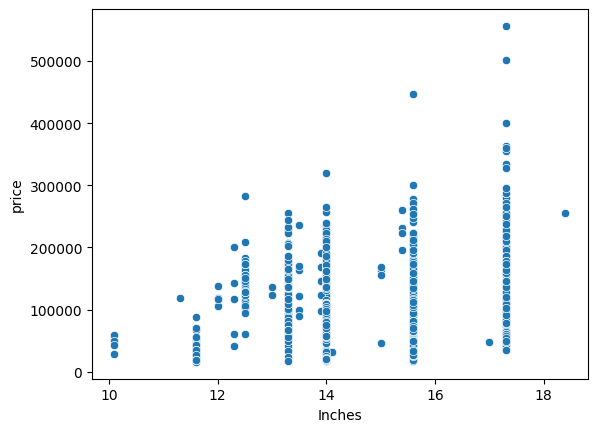

In [130]:
sns.scatterplot(x=df['Inches'],y=df['price'])

In [131]:
df.sample(8
         )


,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
440,Lenovo,IdeaPad 320-15AST,Notebook,17.3,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,47358,...,0,0,1600,900,0,0,0,106.113062,0,1
922,HP,Envy 13-AB077cl,Ultrabook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.39,104846,...,0,1,3200,1800,0,1,0,276.053530,0,0
872,Toshiba,Tecra A50-D-11D,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,126655,...,1,0,1920,1080,0,1,0,141.211998,0,0
603,MSI,Laptop MSI,Gaming,17.3,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,200658,...,1,0,1920,1080,0,1,0,127.335675,0,0
833,Lenovo,Thinkpad T460,Notebook,14.0,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,108222,...,1,0,1920,1080,1,0,0,157.350512,0,0
629,Dell,XPS 15,Notebook,15.6,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,166075,...,1,0,1920,1080,0,1,0,141.211998,0,0
855,Dell,Latitude 5580,Notebook,15.6,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,86231,...,1,0,1920,1080,1,0,0,141.211998,0,0
81,Apple,"MacBook 12""",Ultrabook,12.0,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,137787,...,0,0,2304,1440,1,0,0,226.415547,0,0


In [132]:
# Step 1: Convert 'Memory' to string and remove '.0'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Step 2: Remove 'GB' and replace 'TB' with '000'
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Step 3: Split 'Memory' into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Step 4: Assign first part to 'first' and strip spaces
df["first"] = new[0].str.strip()

# Step 5: Assign second part to 'second' and fill NaN with "0"
df["second"] = new[1].fillna("0").str.strip()

# Step 6: Create indicators for storage types in 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 7: Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Step 8: Create indicators for storage types in 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 9: Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Step 10: Convert 'first' and 'second' to integers, handle empty strings
df["first"] = df["first"].apply(lambda x: int(x) if x else 0)
df["second"] = df["second"].apply(lambda x: int(x) if x else 0)

# Step 11: Calculate total storage for each type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Step 12: Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

# Display the final DataFrame
df.sample(9)



,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price,...,i5,i7,i3,ppi,other,amd,HDD,SSD,Hybrid,Flash_Storage
427,Dell,Latitude 5480,Ultrabook,14.0,8,256 SSD,Intel HD Graphics 620,Linux,1.60,100283,...,0,1,0,157.350512,0,0,0,256,0,0
211,Asus,ROG GL703VD-GC028T,Gaming,17.3,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,128388,...,0,1,0,127.335675,0,0,1000,256,0,0
848,HP,EliteBook x360,2 in 1 Convertible,13.3,8,256 SSD,Intel HD Graphics 620,Windows 10,1.28,207776,...,1,0,0,165.632118,0,0,0,256,0,0
676,Asus,Zenbook 3,Ultrabook,14.0,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,103568,...,1,0,0,157.350512,0,0,0,256,0,0
914,Acer,Aspire E5-575,Notebook,15.6,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.40,45533,...,0,0,1,141.211998,0,0,1000,0,0,0
1290,Dell,Inspiron 3567,Notebook,15.6,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,41883,...,0,0,1,100.454670,0,0,1000,0,0,0
1194,Dell,Inspiron 7378,2 in 1 Convertible,13.3,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,109408,...,1,0,0,165.632118,0,0,0,256,0,0
737,Dell,Inspiron 5379,2 in 1 Convertible,13.3,8,1000 HDD,Intel UHD Graphics 620,Windows 10,1.55,60133,...,1,0,0,165.632118,0,0,1000,0,0,0
339,Dell,Inspiron 7570,Notebook,15.6,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.00,104275,...,1,0,0,141.211998,0,0,0,256,0,0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Ram            1303 non-null   int32  
 5   Memory         1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float32
 9   price          1303 non-null   int64  
 10  touchscreen    1303 non-null   int64  
 11  IPS Panel      1303 non-null   int64  
 12  Full HD        1303 non-null   int64  
 13  Quad HD+       1303 non-null   int64  
 14  width          1303 non-null   int64  
 15  height         1303 non-null   int64  
 16  i5             1303 non-null   int64  
 17  i7             1303 non-null   int64  
 18  i3      

In [137]:
df = df.drop('Memory',axis = 1)

KeyError: "['Memory'] not found in axis"

In [138]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [141]:
df = df[df['OpSys'] != 'Android']

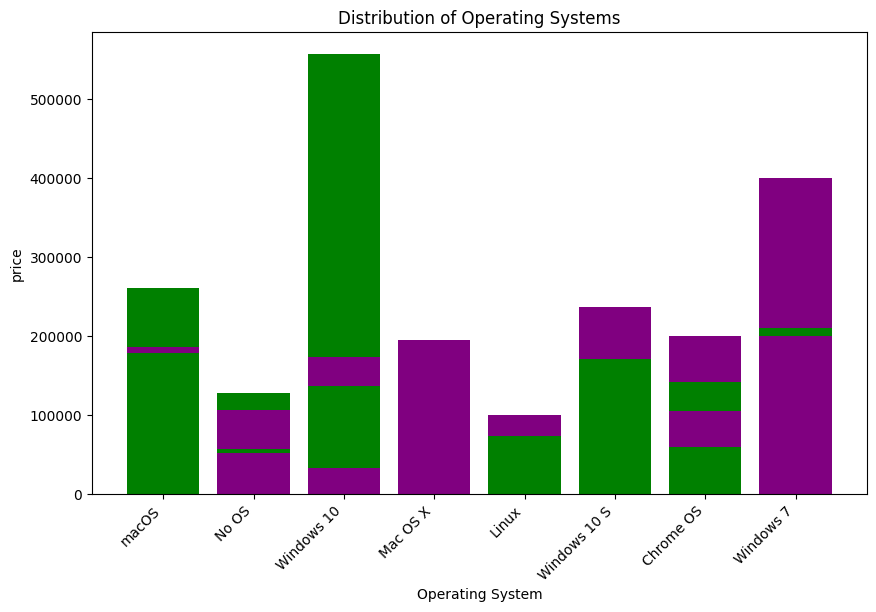

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
color = ['red','yellow','green']
plt.bar(df['OpSys'], df['price'], color= colors)
plt.xlabel('Operating System')
plt.ylabel('price')
plt.title('Distribution of Operating Systems')
plt.xticks(rotation=45, ha='right')
plt.show()